In [4]:
#dataset link: https://drive.google.com/drive/folders/1n67sVTTzye4jtLfk8n-sa2fH2gTx5Ywt?usp=share_link

In [5]:
import tensorflow as tf
import numpy as np
import os
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

DATA_DIR = "../Dataset Korosi/"

In [6]:
TEST_DATA_DIR = '../testdata'
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(
    DATA_DIR, 
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
)

val_generator = train_generator = training_datagen.flow_from_directory(
    DATA_DIR, 
    subset='validation', 
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR, 
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
) 

Found 663 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


In [7]:
## resep yang nemu di: https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner

# model_alexnet = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Flatten(),

#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3,activation='softmax')  
# ])

## resep yang nemu di: https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8

model_alexnet = tf.keras.models.Sequential()
model_alexnet.add(tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(224,224,3)))
model_alexnet.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
model_alexnet.add(tf.keras.layers.Activation('relu'))
model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
model_alexnet.add(tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'))
model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
model_alexnet.add(tf.keras.layers.Activation('relu'))
model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
model_alexnet.add(tf.keras.layers.Activation('relu'))
model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
model_alexnet.add(tf.keras.layers.Activation('relu'))
model_alexnet.add(tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'))
model_alexnet.add(tf.keras.layers.Activation('relu'))
model_alexnet.add(tf.keras.layers.Flatten())
model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
model_alexnet.add(tf.keras.layers.Dropout(0.5))
model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
model_alexnet.add(tf.keras.layers.Dropout(0.5))
model_alexnet.add(tf.keras.layers.Dense(3, activation='softmax'))


In [8]:
model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [9]:
import matplotlib.pyplot as plt

In [10]:
f = open("alexnet.csv", "w")
f.write("epochs,loss,val_loss,acc,val_acc")
f.close()


Epoch 1/10
5/5 - 19s - loss: 1.0976 - acc: 0.4046 - val_loss: 1.0950 - val_acc: 0.4122 - 19s/epoch - 4s/step
Epoch 2/10
5/5 - 11s - loss: 1.0910 - acc: 0.4122 - val_loss: 1.0803 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 3/10
5/5 - 11s - loss: 1.0770 - acc: 0.4122 - val_loss: 1.0592 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 4/10
5/5 - 11s - loss: 1.0597 - acc: 0.4122 - val_loss: 1.0533 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 5/10
5/5 - 12s - loss: 1.0513 - acc: 0.4122 - val_loss: 1.0480 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/10
5/5 - 11s - loss: 1.0467 - acc: 0.4122 - val_loss: 1.0328 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 7/10
5/5 - 12s - loss: 1.0280 - acc: 0.4122 - val_loss: 1.0145 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/10
5/5 - 12s - loss: 1.0194 - acc: 0.4122 - val_loss: 0.9969 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/10
5/5 - 11s - loss: 0.9923 - acc: 0.4122 - val_loss: 1.0096 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 10/10
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

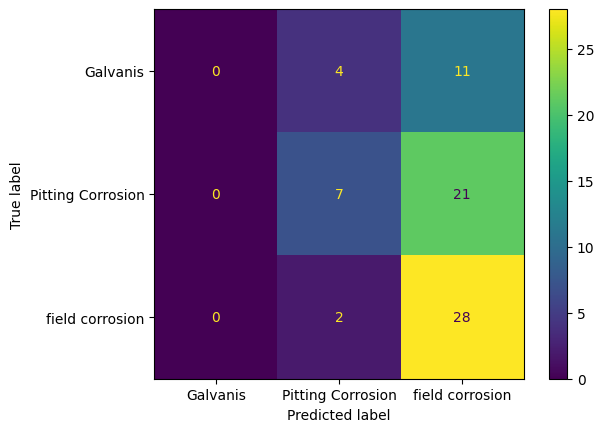

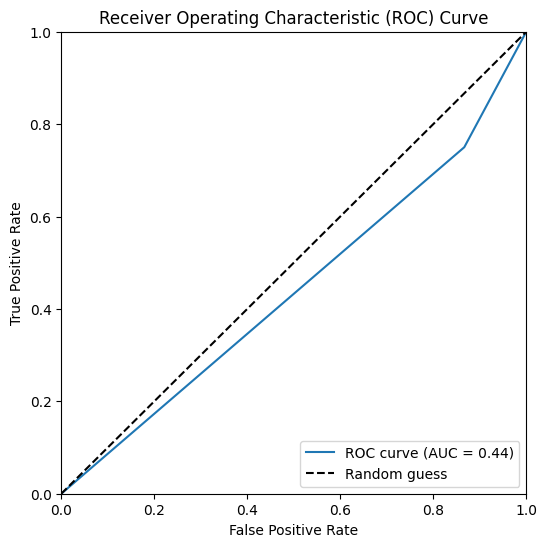

Epoch 1/20
5/5 - 14s - loss: 1.0982 - acc: 0.3817 - val_loss: 1.0961 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/20
5/5 - 11s - loss: 1.0924 - acc: 0.4122 - val_loss: 1.0847 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 3/20
5/5 - 12s - loss: 1.0761 - acc: 0.4122 - val_loss: 1.0610 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/20
5/5 - 12s - loss: 1.0522 - acc: 0.4122 - val_loss: 1.0496 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/20
5/5 - 11s - loss: 1.0617 - acc: 0.4122 - val_loss: 1.0461 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 6/20
5/5 - 12s - loss: 1.0468 - acc: 0.4122 - val_loss: 1.0475 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/20
5/5 - 11s - loss: 1.0448 - acc: 0.4122 - val_loss: 1.0328 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 8/20
5/5 - 11s - loss: 1.0253 - acc: 0.4122 - val_loss: 1.0320 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 9/20
5/5 - 11s - loss: 1.0226 - acc: 0.4122 - val_loss: 0.9952 - val_acc: 0.4122 - 11s/epoch - 2s/step
Epoch 10/20
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

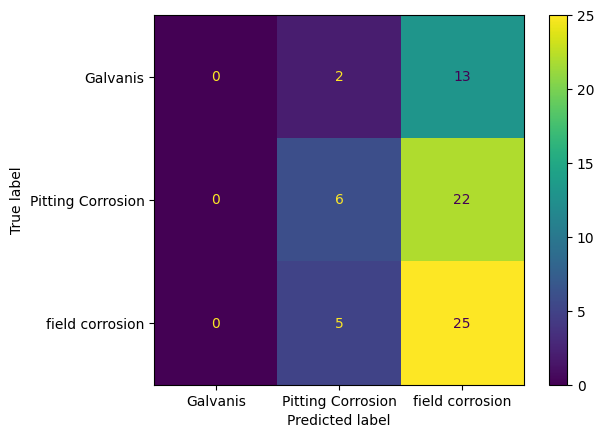

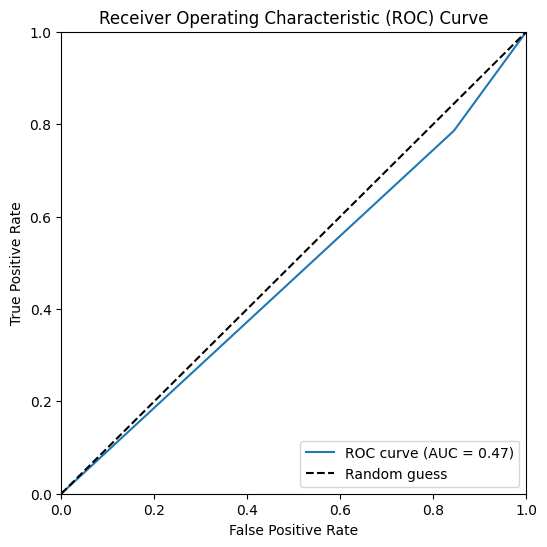

Epoch 1/30
5/5 - 14s - loss: 1.0969 - acc: 0.4275 - val_loss: 1.0929 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/30
5/5 - 12s - loss: 1.0893 - acc: 0.4122 - val_loss: 1.0720 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/30
5/5 - 12s - loss: 1.0727 - acc: 0.4122 - val_loss: 1.0573 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/30
5/5 - 12s - loss: 1.0514 - acc: 0.4122 - val_loss: 1.0578 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/30
5/5 - 12s - loss: 1.0578 - acc: 0.4122 - val_loss: 1.0550 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/30
5/5 - 12s - loss: 1.0563 - acc: 0.4122 - val_loss: 1.0522 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/30
5/5 - 12s - loss: 1.0517 - acc: 0.4122 - val_loss: 1.0426 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/30
5/5 - 12s - loss: 1.0321 - acc: 0.4122 - val_loss: 1.0328 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/30
5/5 - 12s - loss: 1.0306 - acc: 0.4122 - val_loss: 1.0154 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/30
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

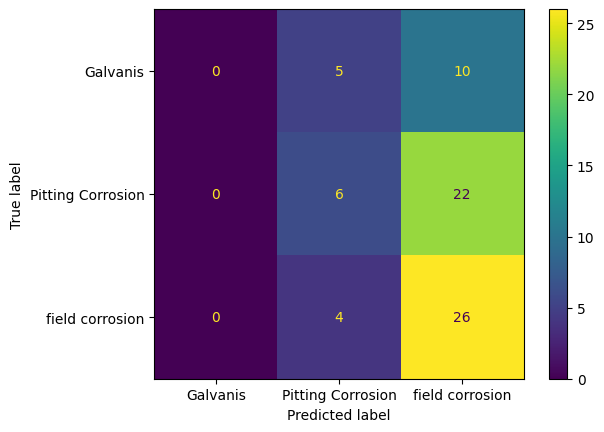

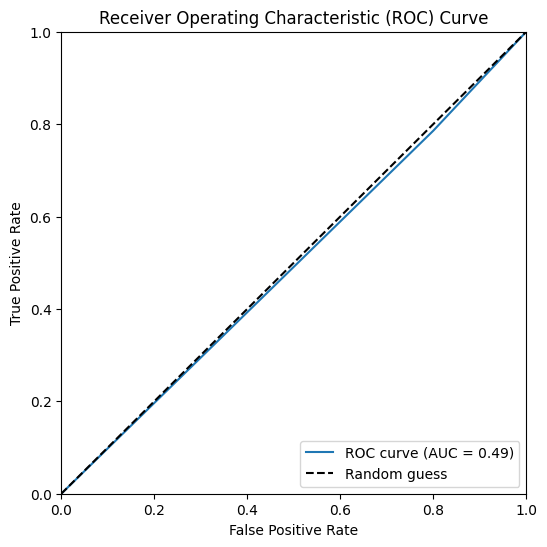

Epoch 1/40
5/5 - 14s - loss: 1.0970 - acc: 0.3893 - val_loss: 1.0887 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/40
5/5 - 12s - loss: 1.0849 - acc: 0.4122 - val_loss: 1.0803 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/40
5/5 - 12s - loss: 1.0758 - acc: 0.4122 - val_loss: 1.0681 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/40
5/5 - 12s - loss: 1.0667 - acc: 0.4122 - val_loss: 1.0567 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/40
5/5 - 12s - loss: 1.0522 - acc: 0.4122 - val_loss: 1.0432 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/40
5/5 - 12s - loss: 1.0439 - acc: 0.4122 - val_loss: 1.0313 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/40
5/5 - 12s - loss: 1.0220 - acc: 0.4122 - val_loss: 1.0161 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/40
5/5 - 12s - loss: 1.0248 - acc: 0.4122 - val_loss: 0.9771 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/40
5/5 - 12s - loss: 0.9704 - acc: 0.4122 - val_loss: 0.9302 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/40
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

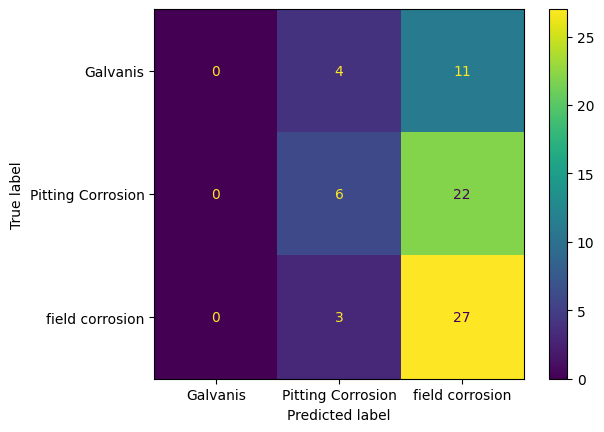

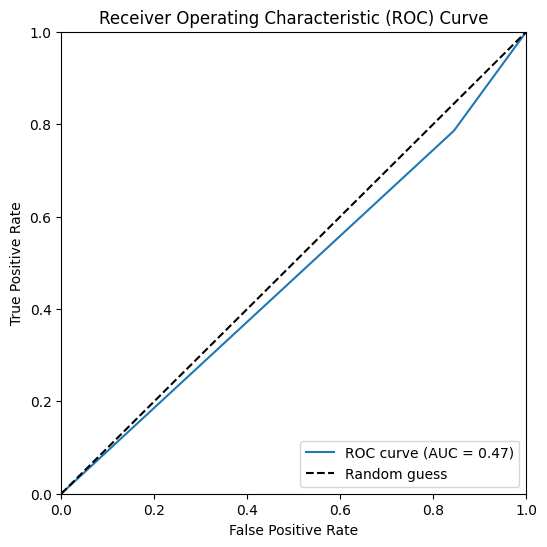

Epoch 1/50
5/5 - 15s - loss: 1.0963 - acc: 0.3817 - val_loss: 1.0910 - val_acc: 0.4122 - 15s/epoch - 3s/step
Epoch 2/50
5/5 - 12s - loss: 1.0842 - acc: 0.4122 - val_loss: 1.0667 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/50
5/5 - 12s - loss: 1.0664 - acc: 0.4122 - val_loss: 1.0587 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/50
5/5 - 12s - loss: 1.0574 - acc: 0.4122 - val_loss: 1.0555 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/50
5/5 - 12s - loss: 1.0525 - acc: 0.4122 - val_loss: 1.0513 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/50
5/5 - 12s - loss: 1.0530 - acc: 0.4122 - val_loss: 1.0484 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/50
5/5 - 12s - loss: 1.0525 - acc: 0.4122 - val_loss: 1.0445 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/50
5/5 - 12s - loss: 1.0381 - acc: 0.4122 - val_loss: 1.0284 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/50
5/5 - 12s - loss: 1.0192 - acc: 0.4122 - val_loss: 1.0058 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/50
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

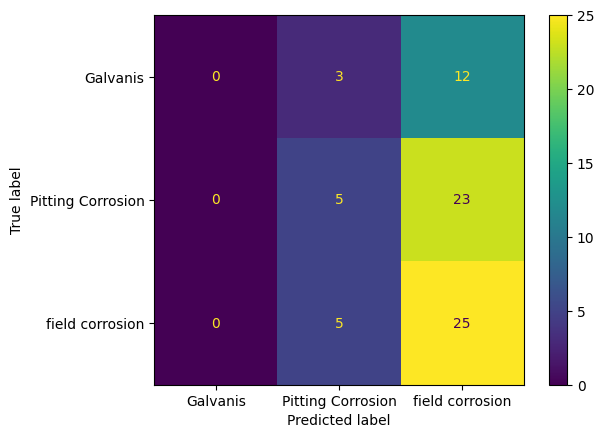

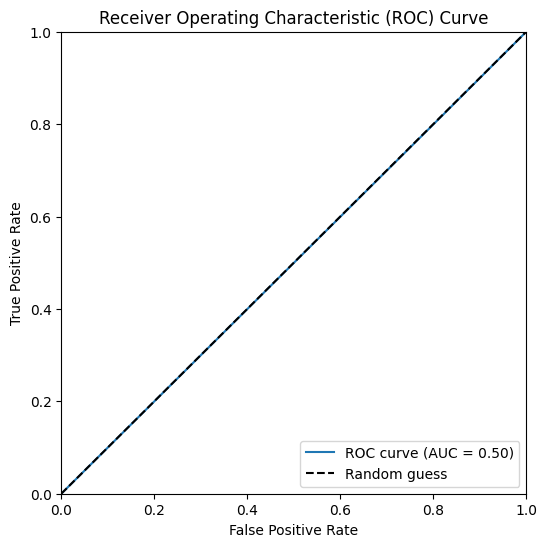

Epoch 1/60
5/5 - 14s - loss: 1.0968 - acc: 0.3893 - val_loss: 1.0897 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/60
5/5 - 12s - loss: 1.0817 - acc: 0.4122 - val_loss: 1.0658 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/60
5/5 - 12s - loss: 1.0651 - acc: 0.4122 - val_loss: 1.0590 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/60
5/5 - 12s - loss: 1.0533 - acc: 0.4122 - val_loss: 1.0533 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/60
5/5 - 12s - loss: 1.0632 - acc: 0.4122 - val_loss: 1.0589 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/60
5/5 - 13s - loss: 1.0516 - acc: 0.4122 - val_loss: 1.0473 - val_acc: 0.4122 - 13s/epoch - 3s/step
Epoch 7/60
5/5 - 12s - loss: 1.0496 - acc: 0.4122 - val_loss: 1.0538 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/60
5/5 - 12s - loss: 1.0524 - acc: 0.4122 - val_loss: 1.0329 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/60
5/5 - 12s - loss: 1.0317 - acc: 0.4122 - val_loss: 1.0098 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/60
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

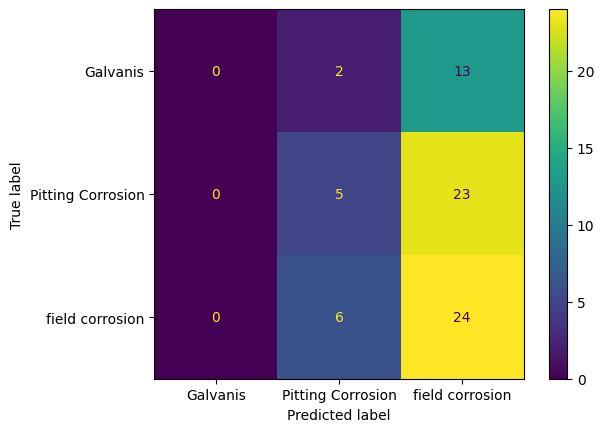

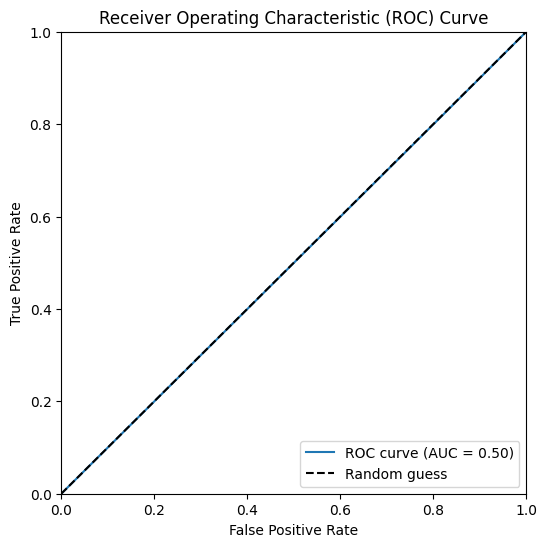

Epoch 1/70
5/5 - 14s - loss: 1.0960 - acc: 0.4198 - val_loss: 1.0915 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/70
5/5 - 12s - loss: 1.0810 - acc: 0.4122 - val_loss: 1.0693 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/70
5/5 - 12s - loss: 1.0597 - acc: 0.4122 - val_loss: 1.0572 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/70
5/5 - 12s - loss: 1.0642 - acc: 0.4122 - val_loss: 1.0728 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/70
5/5 - 12s - loss: 1.0636 - acc: 0.4122 - val_loss: 1.0469 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/70
5/5 - 12s - loss: 1.0511 - acc: 0.4122 - val_loss: 1.0580 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/70
5/5 - 12s - loss: 1.0625 - acc: 0.4122 - val_loss: 1.0577 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/70
5/5 - 12s - loss: 1.0503 - acc: 0.4122 - val_loss: 1.0318 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/70
5/5 - 12s - loss: 1.0271 - acc: 0.4122 - val_loss: 1.0191 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/70
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

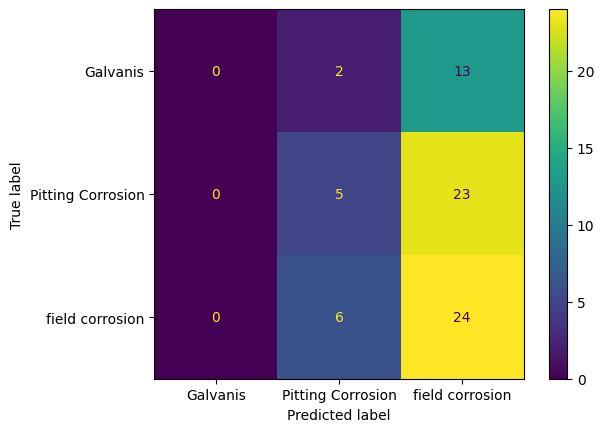

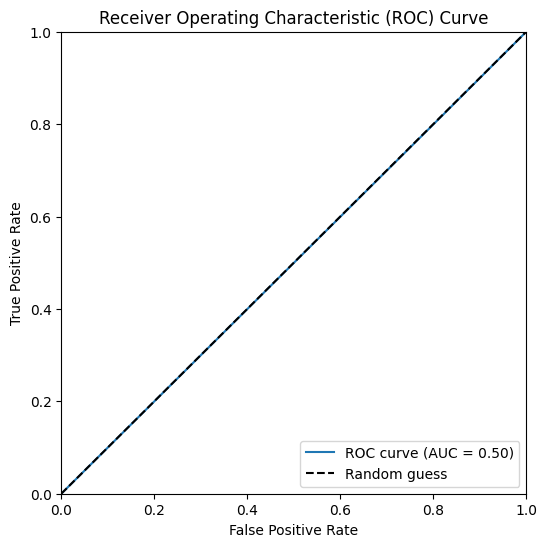

Epoch 1/80
5/5 - 14s - loss: 1.0963 - acc: 0.3893 - val_loss: 1.0918 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/80
5/5 - 12s - loss: 1.0888 - acc: 0.4122 - val_loss: 1.0810 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/80
5/5 - 12s - loss: 1.0784 - acc: 0.4122 - val_loss: 1.0665 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/80
5/5 - 12s - loss: 1.0675 - acc: 0.4122 - val_loss: 1.0592 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/80
5/5 - 12s - loss: 1.0580 - acc: 0.4122 - val_loss: 1.0480 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/80
5/5 - 12s - loss: 1.0436 - acc: 0.4122 - val_loss: 1.0398 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/80
5/5 - 12s - loss: 1.0397 - acc: 0.4122 - val_loss: 1.0270 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/80
5/5 - 12s - loss: 1.0318 - acc: 0.4122 - val_loss: 1.0454 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/80
5/5 - 12s - loss: 1.0106 - acc: 0.4122 - val_loss: 1.0060 - val_acc: 0.4198 - 12s/epoch - 2s/step
Epoch 10/80
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

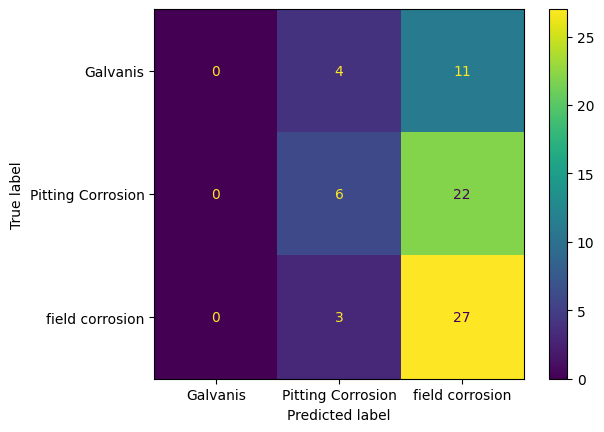

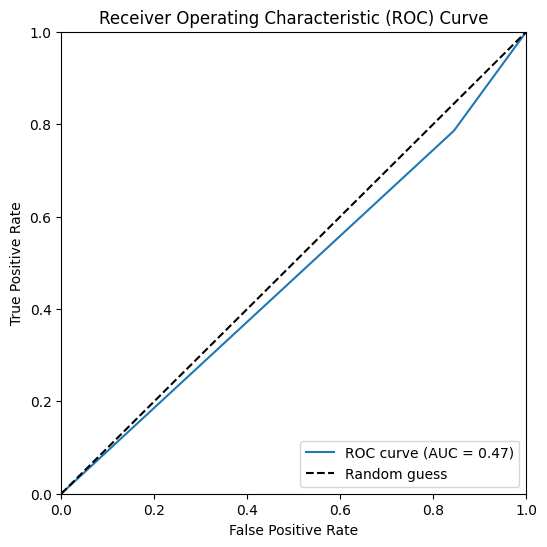

Epoch 1/90
5/5 - 14s - loss: 1.0977 - acc: 0.4198 - val_loss: 1.0960 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/90
5/5 - 12s - loss: 1.0931 - acc: 0.4275 - val_loss: 1.0878 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/90
5/5 - 12s - loss: 1.0770 - acc: 0.4122 - val_loss: 1.0634 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/90
5/5 - 12s - loss: 1.0512 - acc: 0.4122 - val_loss: 1.0630 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/90
5/5 - 12s - loss: 1.0676 - acc: 0.4122 - val_loss: 1.0465 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/90
5/5 - 12s - loss: 1.0347 - acc: 0.4122 - val_loss: 1.0565 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/90
5/5 - 12s - loss: 1.0629 - acc: 0.4122 - val_loss: 1.0617 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/90
5/5 - 12s - loss: 1.0577 - acc: 0.4122 - val_loss: 1.0495 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/90
5/5 - 12s - loss: 1.0400 - acc: 0.4122 - val_loss: 1.0255 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/90
5/5 - 1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

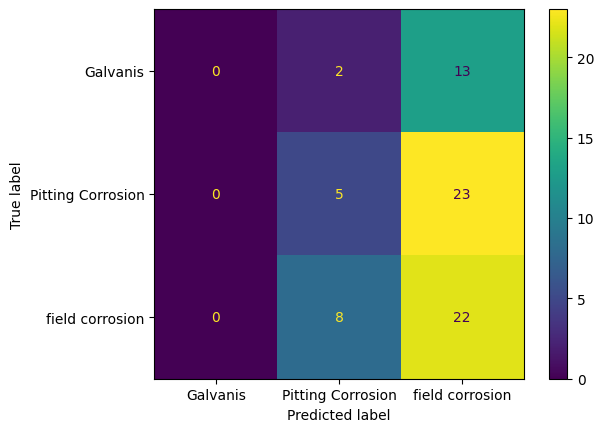

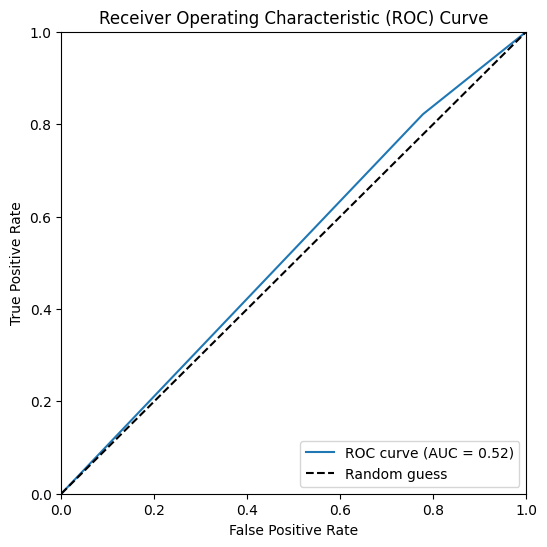

Epoch 1/100
5/5 - 14s - loss: 1.0968 - acc: 0.3969 - val_loss: 1.0914 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/100
5/5 - 12s - loss: 1.0853 - acc: 0.4122 - val_loss: 1.0727 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/100
5/5 - 12s - loss: 1.0666 - acc: 0.4122 - val_loss: 1.0585 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/100
5/5 - 12s - loss: 1.0623 - acc: 0.4122 - val_loss: 1.0589 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/100
5/5 - 12s - loss: 1.0552 - acc: 0.4122 - val_loss: 1.0486 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/100
5/5 - 12s - loss: 1.0471 - acc: 0.4122 - val_loss: 1.0523 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/100
5/5 - 12s - loss: 1.0542 - acc: 0.4122 - val_loss: 1.0486 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/100
5/5 - 12s - loss: 1.0417 - acc: 0.4122 - val_loss: 1.0282 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/100
5/5 - 12s - loss: 1.0149 - acc: 0.4122 - val_loss: 0.9964 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

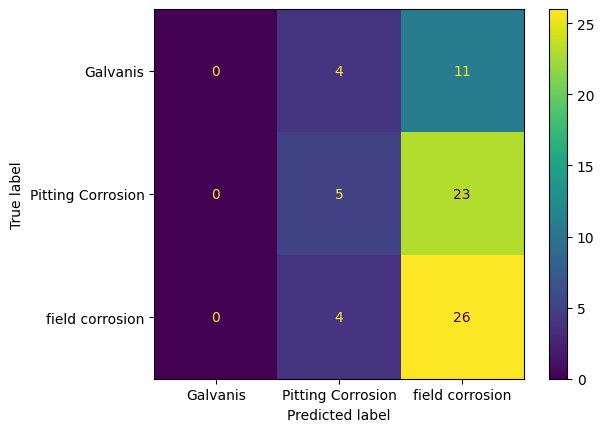

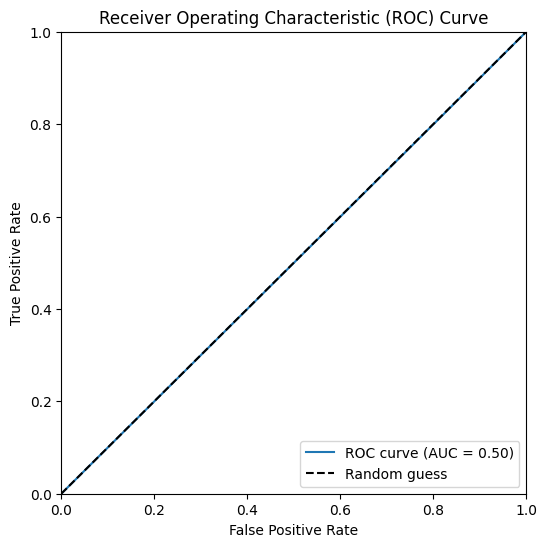

Epoch 1/110
5/5 - 14s - loss: 1.0973 - acc: 0.4046 - val_loss: 1.0953 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/110
5/5 - 12s - loss: 1.0926 - acc: 0.4122 - val_loss: 1.0879 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/110
5/5 - 12s - loss: 1.0838 - acc: 0.4122 - val_loss: 1.0749 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/110
5/5 - 12s - loss: 1.0634 - acc: 0.4122 - val_loss: 1.0547 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/110
5/5 - 12s - loss: 1.0617 - acc: 0.4122 - val_loss: 1.0446 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/110
5/5 - 12s - loss: 1.0377 - acc: 0.4122 - val_loss: 1.0379 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/110
5/5 - 12s - loss: 1.0399 - acc: 0.4122 - val_loss: 1.0162 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/110
5/5 - 12s - loss: 1.0255 - acc: 0.4122 - val_loss: 0.9966 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/110
5/5 - 12s - loss: 0.9841 - acc: 0.4427 - val_loss: 0.9667 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/1

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

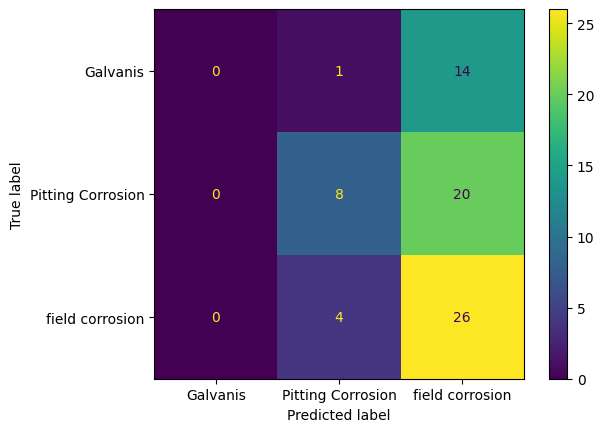

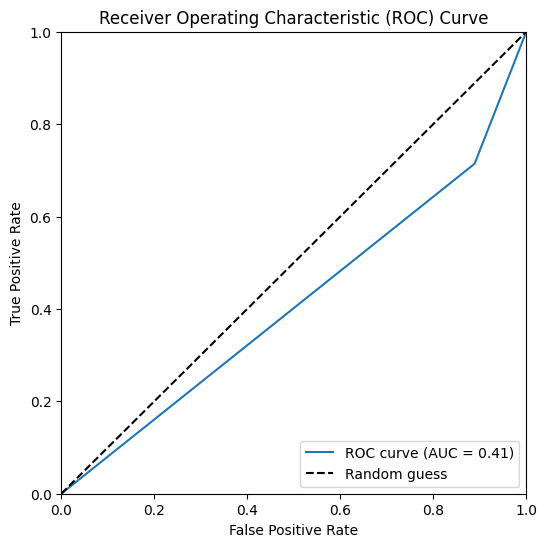

Epoch 1/120
5/5 - 14s - loss: 1.0970 - acc: 0.4122 - val_loss: 1.0913 - val_acc: 0.4122 - 14s/epoch - 3s/step
Epoch 2/120
5/5 - 12s - loss: 1.0862 - acc: 0.4122 - val_loss: 1.0743 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 3/120
5/5 - 12s - loss: 1.0721 - acc: 0.4122 - val_loss: 1.0660 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 4/120
5/5 - 12s - loss: 1.0749 - acc: 0.4122 - val_loss: 1.0540 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 5/120
5/5 - 12s - loss: 1.0565 - acc: 0.4122 - val_loss: 1.0576 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 6/120
5/5 - 12s - loss: 1.0440 - acc: 0.4122 - val_loss: 1.0407 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 7/120
5/5 - 12s - loss: 1.0427 - acc: 0.4122 - val_loss: 1.0335 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 8/120
5/5 - 12s - loss: 1.0379 - acc: 0.4122 - val_loss: 1.0431 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 9/120
5/5 - 12s - loss: 1.0273 - acc: 0.4122 - val_loss: 1.0037 - val_acc: 0.4122 - 12s/epoch - 2s/step
Epoch 10/1

<Figure size 640x480 with 0 Axes>

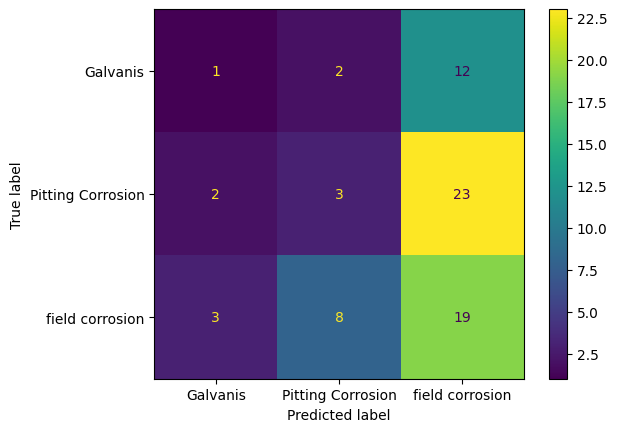

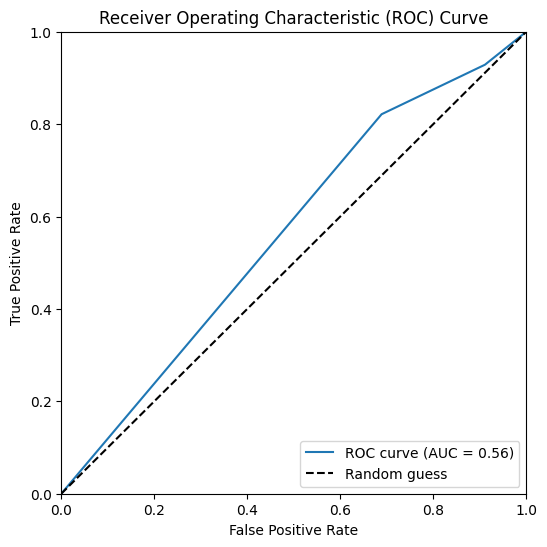

<Figure size 640x480 with 0 Axes>

In [11]:
Wsave = model_alexnet.get_weights()
for times in range(12):
    epo = (times+1)*10
    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=epo, verbose = 2)

    f = open("alexnet.csv", "a")
    f.write("\n"+str(epo)+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/loss_'+str(epo)+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/acc_'+str(epo)+'.png')
    
    plt.clf()

    PLOT_PARAM = epo # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./alexnet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./alexnet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./alexnet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()